# Multiple Linear Regression Lab : House Prices

### Overview
Estimate house prices using MLR

### Builds on
None

### Run time
approx. 20 minutes

### Notes


## Step 1 - Load Data

In [1]:
import os
import urllib.request

data_location = "house-sales-full.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv'
#data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/house-prices/house-sales-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)


data_location: house-sales-full.csv


In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

house_prices = pd.read_csv(data_location)
house_prices.sample(10)

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
4536,4537,6/25/12,735000,1563102685,Single Family,6/1/12,322000,0.74,"993,391.00",1,...,2.50,3,9,1995,0,0,254000,623000,98116,False
4990,4991,5/19/10,585000,1726069262,Single Family,5/1/10,347800,0.80,"732,007.00",1,...,3.50,4,8,1986,0,0,198000,391000,98077,False
13678,13679,7/25/08,230000,4025300285,Single Family,7/1/08,400300,0.92,"250,052.00",1,...,1.00,4,7,1946,0,1,169000,148000,98155,False
22130,22131,9/7/06,700000,7922800570,Single Family,9/1/06,414800,0.95,"734,426.00",1,...,2.50,2,10,1979,0,1,326000,619000,98008,False
6546,6547,3/23/06,416990,2133010270,Single Family,3/1/06,392100,0.90,"462,826.00",1,...,2.50,3,7,1989,0,0,104000,220000,98019,False
22371,22372,5/22/12,699000,7986401280,Single Family,5/1/12,318000,0.73,"956,619.00",1,...,2.50,3,10,1994,0,0,295000,708000,98107,False
17058,17059,4/29/14,344800,6056101071,Townhouse,4/1/14,395300,0.91,"379,603.00",1,...,2.25,2,8,2014,0,0,92000,285000,-1,True
19421,19422,7/20/07,540000,7211300010,Single Family,7/1/07,434200,1.00,"541,244.00",1,...,2.25,4,8,1974,0,0,269000,290000,98052,False
19441,19442,6/11/07,635000,7212320030,Single Family,6/1/07,433200,1.00,"637,932.00",1,...,2.50,4,10,1983,0,0,345000,471000,98052,False
10033,10034,5/25/11,225400,3145600095,Single Family,5/1/11,316900,0.73,"309,543.00",1,...,1.75,3,7,1949,0,0,167000,204000,98118,False


In [3]:
house_prices.isna().any()

DocumentID         False
Date               False
SalePrice          False
PropertyID         False
PropertyType       False
ym                 False
zhvi_px            False
zhvi_idx           False
AdjSalePrice       False
NbrLivingUnits     False
SqFtLot            False
SqFtTotLiving      False
SqFtFinBasement    False
Bathrooms          False
Bedrooms           False
BldgGrade          False
YrBuilt            False
YrRenovated        False
TrafficNoise       False
LandVal            False
ImpsVal            False
ZipCode            False
NewConstruction    False
dtype: bool

## Step 2 - Explore Data (EDA)
EDA is a great way to get a sense of the data.  

Try to find answers to the following questions, by looking at the output of `describe` below

- How many 'max' bedrooms do we have? :-)
- Find min/max of 'SalePrice'
- Do you think we have outliers in data

In [4]:
## TODO use 'describe()' function to understand data
house_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
DocumentID,"27,063.00","13,532.00","7,812.56",1.00,"6,766.50","13,532.00","20,297.50","27,063.00"
SalePrice,"27,063.00","511,626.20","342,821.17","3,000.00","329,000.00","425,000.00","590,000.00","11,000,000.00"
PropertyID,"27,063.00","4,680,324,882.08","2,896,350,979.15","1,000,102.00","2,213,000,057.50","3,972,900,140.00","7,504,001,385.00","9,906,000,035.00"
zhvi_px,"27,063.00","390,750.58","37,024.46","311,600.00","357,100.00","400,600.00","421,200.00","435,200.00"
zhvi_idx,"27,063.00",0.90,0.09,0.72,0.82,0.92,0.97,1.00
AdjSalePrice,"27,063.00","570,918.76","380,236.63","3,368.00","366,918.50","475,664.00","655,061.00","11,644,855.00"
NbrLivingUnits,"27,063.00",1.02,0.15,1.00,1.00,1.00,1.00,5.00
SqFtLot,"27,063.00","10,997.68","28,110.66",494.00,"4,257.50","6,636.00","9,450.00","1,024,068.00"
SqFtTotLiving,"27,063.00","2,122.96",939.84,370.00,"1,440.00","1,940.00","2,610.00","10,740.00"
SqFtFinBasement,"27,063.00",275.30,428.71,0.00,0.00,0.00,510.00,"3,500.00"


In [5]:
## any correlated columns?
## TODO : use 'corr' function to verify
house_prices.corr()

,DocumentID,SalePrice,PropertyID,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
DocumentID,1.00,-0.02,0.99,-0.02,-0.02,-0.02,-0.02,-0.11,-0.02,-0.03,-0.01,-0.03,-0.01,0.03,-0.01,-0.04,-0.03,-0.01,-0.01,0.05
SalePrice,-0.02,1.00,-0.02,0.12,0.12,0.98,0.02,0.14,0.68,0.29,0.52,0.32,0.66,0.08,0.09,-0.01,0.79,0.81,-0.02,0.04
PropertyID,0.99,-0.02,1.00,-0.02,-0.02,-0.02,-0.01,-0.11,-0.02,-0.03,-0.01,-0.03,-0.01,0.03,-0.01,-0.04,-0.03,-0.02,-0.01,0.05
zhvi_px,-0.02,0.12,-0.02,1.00,1.00,-0.03,0.02,-0.00,-0.01,0.02,-0.03,0.00,-0.04,-0.06,0.01,0.01,-0.00,-0.02,0.09,-0.02
zhvi_idx,-0.02,0.12,-0.02,1.00,1.00,-0.03,0.02,-0.00,-0.01,0.02,-0.03,0.00,-0.04,-0.06,0.01,0.01,-0.00,-0.02,0.09,-0.02
AdjSalePrice,-0.02,0.98,-0.02,-0.03,-0.03,1.00,0.02,0.14,0.69,0.29,0.52,0.32,0.67,0.08,0.09,-0.02,0.80,0.82,-0.03,0.04
NbrLivingUnits,-0.02,0.02,-0.01,0.02,0.02,0.02,1.00,-0.00,0.05,0.06,0.10,0.16,-0.05,-0.11,0.01,0.08,0.03,-0.00,0.04,-0.05
SqFtLot,-0.11,0.14,-0.11,-0.00,-0.00,0.14,-0.00,1.00,0.21,0.05,0.10,0.08,0.14,0.03,0.01,-0.01,0.08,0.11,0.06,-0.09
SqFtTotLiving,-0.02,0.68,-0.02,-0.01,-0.01,0.69,0.05,0.21,1.00,0.39,0.75,0.62,0.76,0.30,0.05,-0.07,0.47,0.76,-0.10,0.11
SqFtFinBasement,-0.03,0.29,-0.03,0.02,0.02,0.29,0.06,0.05,0.39,1.00,0.26,0.30,0.14,-0.22,0.11,0.05,0.29,0.28,0.10,-0.14


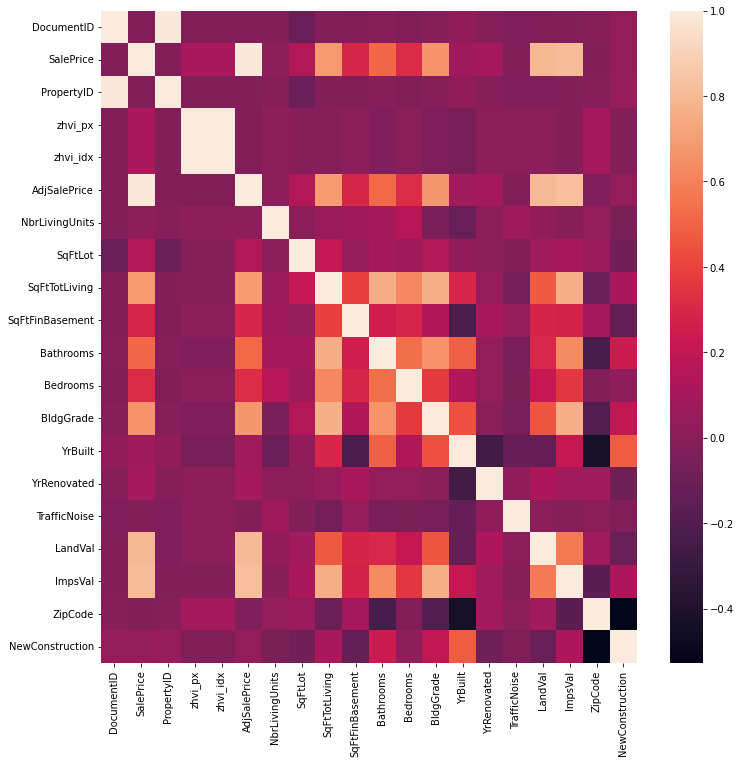

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12,12))
sns.heatmap(house_prices.corr())
plt.show()

## Step 3 - Shape Data
Wow! That's a lot of columns.  Maybe we should foucs on just a few of them.

**=> Select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"**

In [7]:
## TODO : select columns
## start with : 'Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot'
input_columns= ['Bedrooms',  'Bathrooms', 'SqFtTotLiving', 'SqFtLot']

## TODO : select label column
##  Hint : 'SalePrice'
label_column = ['SalePrice']

house_prices2 = house_prices[input_columns + label_column]
house_prices2

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,SalePrice
0,6,3.00,2400,9373,280000
1,4,3.75,3764,20156,1000000
2,4,1.75,2060,26036,745000
3,5,3.75,3200,8618,425000
4,4,1.75,1720,8620,240000
...,...,...,...,...,...
27058,2,1.75,1410,1161,374000
27059,2,1.75,1410,1005,374000
27060,4,1.00,1070,11170,165000
27061,3,2.00,1345,6223,315000


In [8]:

from sklearn.model_selection import train_test_split

#x = house_prices2[input_columns]
#y = house_prices2[label_column]

#print ("x.shape = ", x.shape)
#print ("y.shape = ", y.shape)

X = house_prices2[input_columns].values

Y = house_prices2[label_column].values

split_test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)

## Step 4 : Run Regression

In [9]:
from sklearn.linear_model import LinearRegression

## TODO : fit (x,y)
model = LinearRegression ().fit(X, Y.ravel())
model

LinearRegression()

## Step 5 : Predict

In [10]:
## TODO Predict on 'x'
predictions = model.predict(X)
predictions

array([429991.82730796, 950801.58545232, 444361.65533633, ...,
       158195.01064552, 316458.05162456, 154251.23178651])

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

a = house_prices2[input_columns  + label_column]
a['predicted_price'] = predictions
a

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,SalePrice,predicted_price
0,6,3.00,2400,9373,280000,"429,991.83"
1,4,3.75,3764,20156,1000000,"950,801.59"
2,4,1.75,2060,26036,745000,"444,361.66"
3,5,3.75,3200,8618,425000,"729,743.95"
4,4,1.75,1720,8620,240000,"351,192.04"
...,...,...,...,...,...,...
27058,2,1.75,1410,1161,374000,"396,038.84"
27059,2,1.75,1410,1005,374000,"396,050.47"
27060,4,1.00,1070,11170,165000,"158,195.01"
27061,3,2.00,1345,6223,315000,"316,458.05"


## Step 6 : Evaluate

**Q==> Are any coefficients close to zero?  What does that mean?**

**Q==> Also inspect R2 value.  Is it decent?**

In [12]:
## coefficients
import numpy as np
np.set_printoptions(precision=2, suppress=True)

print ("coefficients: " , model.coef_)
print ("intercept : ", model.intercept_)

coefficients:  [-65211.74  16274.19    277.85     -0.07]
intercept :  106303.30611508369


In [13]:
## print each feature and it's coefficients
coef = pd.DataFrame({"input_column" : input_columns,  
                     "coefficient": model.coef_[0]})
coef

,input_column,coefficient
0,Bedrooms,"-65,211.74"
1,Bathrooms,"-65,211.74"
2,SqFtTotLiving,"-65,211.74"
3,SqFtLot,"-65,211.74"


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

## TODO : find R2 by comparing 'y' and 'predictions'
print ("R2 : " , r2_score(Y, predictions))

print ("MSE : ", mean_squared_error(Y, predictions))
print ("RMSE : ", sqrt(mean_squared_error(Y, predictions)) )

R2 :  0.4834822523621969
MSE :  60702204448.74506
RMSE :  246378.1736452015


## Step 7 : Predict on New Data

In [15]:
## Create some of your own data
## Bedrooms : 4,  Bathrooms : 3.5,   SqFtTotLiving : 2000, SqFtLot: 3000
new_data = pd.DataFrame({'Bedrooms' : [5,3,4],
                         'Bathrooms' : [3,2, 3.5],
                         'SqFtTotLiving' : [4400, 1800, 2000],
                         'SqFtLot' : [10000, 5000, 3000]
             })
new_data

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot
0,5,3.00,4400,10000
1,3,2.00,1800,5000
2,4,3.50,2000,3000


In [16]:
new_prediction = model.predict(new_data)
new_prediction

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1050852.9 ,  442970.11,  457888.41])

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

new_data['predicted_price'] = new_prediction
new_data

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,predicted_price
0,5,3.00,4400,10000,"1,050,852.90"
1,3,2.00,1800,5000,"442,970.11"
2,4,3.50,2000,3000,"457,888.41"


## Step 8 : Imporove Model Performance
Now that we have done a 'end-to-end' implementation in Regression.  
How ever our accuracy isn't all that great!  

**Q ==> What can we do to improve our model?**

One option is to choose better input columns.  
in Step-3, add more input columns.
For example you can add 'LandVal' to input columns as follows

```python
input_columns= ['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot', 'LandVal']
```

And then run the notebook again, and see if the accuracy goes up!

### Class Competition

Let's see how high you can bring up the model accuracy, with fewest columns as possible.

In [18]:
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
"""
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
"""

"\n# pearson's correlation feature selection for numeric input and numeric output\nfrom sklearn.datasets import make_regression\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\n# generate dataset\nX, y = make_regression(n_samples=100, n_features=100, n_informative=10)\n# define feature selection\nfs = SelectKBest(score_func=f_regression, k=10)\n# apply feature selection\nX_selected = fs.fit_transform(X, y)\nprint(X_selected.shape)\n"

In [19]:
house_prices2.columns

Index(['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot', 'SalePrice'], dtype='object')

In [20]:
house_prices.columns

Index(['DocumentID', 'Date', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [21]:
#house_prices['DtStamp'] = pd.to_datetime(house_prices['Date']) - pd.datetime(1970,1,1)
#house_prices['Date'].astype('datetime64[ns]')
house_prices['DtStamp'] = pd.to_datetime(house_prices['Date']) - pd.datetime(1970,1,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
house_prices['DtStamp']= house_prices['DtStamp'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
